In [3]:
import cv2
from keras.utils import np_utils
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [9]:
image_gen.flow_from_directory('./CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)        

In [13]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('./CATS_DOGS/train', 
                              target_size=(64, 64, 3)[:2],
                              batch_size = batch_size, 
                              class_mode='binary')
test_image_gen = image_gen.flow_from_directory('./CATS_DOGS/test', 
                              target_size=(64, 64, 3)[:2],
                              batch_size = batch_size, 
                              class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [14]:
results = model.fit_generator(train_image_gen, epochs=100, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=15)

C:\Users\alexa\AppData\Local\Temp\ipykernel_18244\635105926.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=100, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=15)


Epoch 1/100
150/150 [==============================] - 25s 157ms/step - loss: 0.6957 - accuracy: 0.5025 - val_loss: 0.6913 - val_accuracy: 0.5583
Epoch 2/100
150/150 [==============================] - 22s 148ms/step - loss: 0.6918 - accuracy: 0.5142 - val_loss: 0.6777 - val_accuracy: 0.5875
Epoch 3/100
150/150 [==============================] - 21s 138ms/step - loss: 0.6806 - accuracy: 0.5554 - val_loss: 0.6911 - val_accuracy: 0.5667
Epoch 4/100
150/150 [==============================] - 20s 135ms/step - loss: 0.6723 - accuracy: 0.5767 - val_loss: 0.6583 - val_accuracy: 0.5958
Epoch 5/100
150/150 [==============================] - 19s 127ms/step - loss: 0.6697 - accuracy: 0.5914 - val_loss: 0.6262 - val_accuracy: 0.6667
Epoch 6/100
150/150 [==============================] - 19s 124ms/step - loss: 0.6563 - accuracy: 0.6233 - val_loss: 0.6850 - val_accuracy: 0.5333
Epoch 7/100
150/150 [==============================] - 18s 121ms/step - loss: 0.6577 - accuracy: 0.6017 - val_loss: 0.6567 -

In [28]:
results.history['val_accuracy']

[0.5583333373069763,
 0.5874999761581421,
 0.5666666626930237,
 0.5958333611488342,
 0.6666666865348816,
 0.5333333611488342,
 0.6416666507720947,
 0.625,
 0.6416666507720947,
 0.6416666507720947,
 0.625,
 0.7041666507720947,
 0.7333333492279053,
 0.737500011920929,
 0.6958333253860474,
 0.7208333611488342,
 0.699999988079071,
 0.6708333492279053,
 0.7166666388511658,
 0.737500011920929,
 0.699999988079071,
 0.75,
 0.6958333253860474,
 0.7291666865348816,
 0.7749999761581421,
 0.7708333134651184,
 0.7458333373069763,
 0.7083333134651184,
 0.762499988079071,
 0.737500011920929,
 0.7875000238418579,
 0.7291666865348816,
 0.7791666388511658,
 0.75,
 0.762499988079071,
 0.8083333373069763,
 0.7875000238418579,
 0.7791666388511658,
 0.7666666507720947,
 0.7208333611488342,
 0.7124999761581421,
 0.762499988079071,
 0.7791666388511658,
 0.7708333134651184,
 0.7916666865348816,
 0.7541666626930237,
 0.800000011920929,
 0.800000011920929,
 0.8041666746139526,
 0.762499988079071,
 0.75,
 0.77083

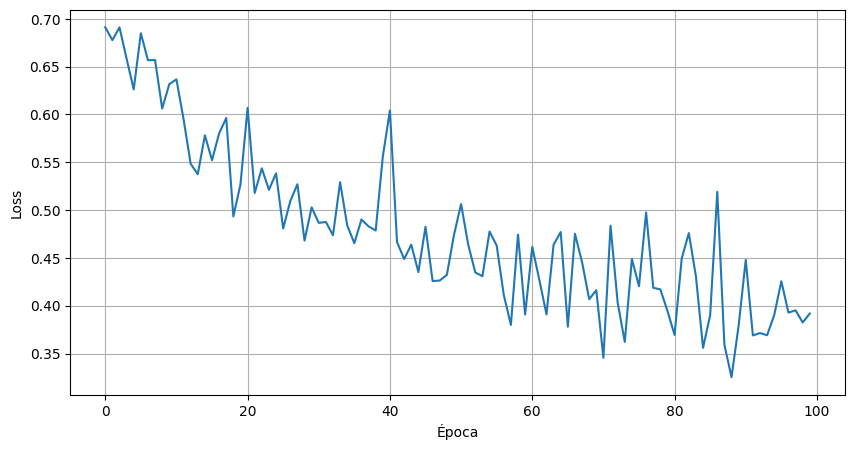

In [29]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Época')
plt.grid()
plt.savefig('loss.png')

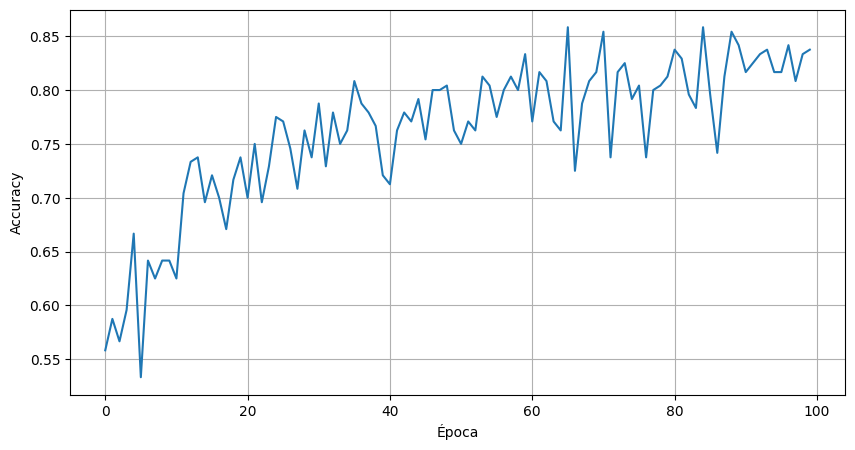

In [30]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.grid()
plt.savefig('accuracy.png')

In [31]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [85]:

import numpy as np
from tensorflow.keras.preprocessing import image

dog_file = './CATS_DOGS/train/CAT/50.jpg'

dog_img = image.load_img(dog_file, target_size=(64, 64))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 25ms/step


In [86]:
print(f'A probabilidade de ser um cachorro é de: {prediction_prob}')

A probabilidade de ser um cachorro é de: [[0.01267886]]
